In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import itertools
import csv

In [2]:
df = pd.read_csv("Glass.csv", sep=',')
df.columns.values

array(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

In [3]:
data = df.iloc[:,1:10]
labels = df.iloc[:,10].astype(str)

In [4]:
x = data.values.astype(np.float32) #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df = pd.concat([df_scaled, labels], axis=1)
df

,0,1,2,3,4,5,6,7,8,Class
0,0.432838,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.000000,1
1,0.283585,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.000000,1
2,0.220810,0.421053,0.790646,0.389408,0.567857,0.062802,0.218402,0.000000,0.000000,1
3,0.285782,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.000000,1
4,0.275246,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.000000,1
5,0.211151,0.309775,0.804009,0.414330,0.564286,0.103060,0.245353,0.000000,0.509804,1
6,0.275681,0.386466,0.801782,0.264798,0.585713,0.093398,0.254647,0.000000,0.000000,1
7,0.281387,0.363910,0.804009,0.236760,0.612499,0.091787,0.261152,0.000000,0.000000,1
8,0.352509,0.497744,0.797327,0.336449,0.405357,0.090177,0.266729,0.000000,0.000000,1
9,0.280952,0.341353,0.801782,0.333333,0.567857,0.091787,0.276022,0.000000,0.215686,1


In [5]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Euclidean metric and k tuning

              precision    recall  f1-score   support

           1       0.64      0.60      0.62        35
           3       0.71      0.83      0.76        41
           2       0.43      0.27      0.33        11
           5       1.00      1.00      1.00         6
           7       0.50      0.25      0.33         4
           6       0.82      0.90      0.86        10

   micro avg       0.69      0.69      0.69       107
   macro avg       0.68      0.64      0.65       107
weighted avg       0.67      0.69      0.68       107

accuracy:  0.6915887850467289


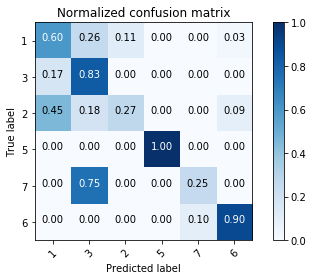

              precision    recall  f1-score   support

           1       0.74      0.83      0.78        35
           3       0.85      0.63      0.72        35
           2       0.36      0.67      0.47         6
           5       0.67      0.57      0.62         7
           7       0.57      0.80      0.67         5
           6       0.83      0.79      0.81        19

   micro avg       0.73      0.73      0.73       107
   macro avg       0.67      0.71      0.68       107
weighted avg       0.76      0.73      0.73       107

accuracy:  0.7289719626168224


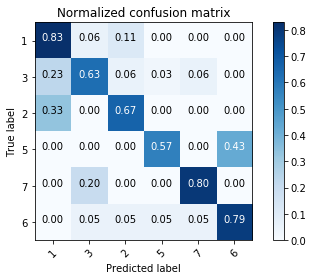

              precision    recall  f1-score   support

           1       0.66      0.75      0.70        36
           3       0.78      0.68      0.72        37
           2       0.29      0.29      0.29         7
           5       0.86      0.86      0.86         7
           7       0.67      0.67      0.67         3
           6       0.88      0.88      0.88        17

   micro avg       0.72      0.72      0.72       107
   macro avg       0.69      0.69      0.69       107
weighted avg       0.73      0.72      0.72       107

accuracy:  0.719626168224299


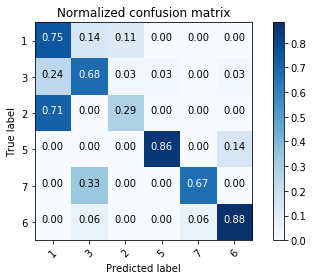

              precision    recall  f1-score   support

           1       0.72      0.76      0.74        34
           3       0.84      0.82      0.83        39
           2       0.44      0.40      0.42        10
           5       0.75      1.00      0.86         6
           7       0.60      0.50      0.55         6
           6       0.82      0.75      0.78        12

   micro avg       0.75      0.75      0.75       107
   macro avg       0.70      0.71      0.70       107
weighted avg       0.75      0.75      0.74       107

accuracy:  0.7476635514018691


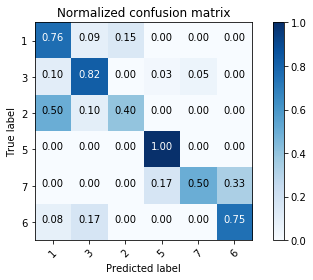

/home/valia/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.62      0.82      0.71        34
           3       0.70      0.68      0.69        34
           2       0.33      0.20      0.25        10
           5       0.83      0.56      0.67         9
           7       0.00      0.00      0.00         4
           6       0.82      0.88      0.85        16

   micro avg       0.67      0.67      0.67       107
   macro avg       0.55      0.52      0.53       107
weighted avg       0.64      0.67      0.65       107

accuracy:  0.6728971962616822


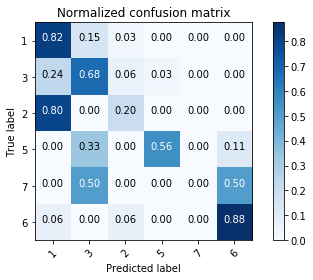

              precision    recall  f1-score   support

           1       0.62      0.69      0.66        36
           3       0.75      0.79      0.77        42
           2       0.14      0.14      0.14         7
           5       1.00      0.75      0.86         4
           7       0.50      0.20      0.29         5
           6       0.82      0.69      0.75        13

   micro avg       0.67      0.67      0.67       107
   macro avg       0.64      0.54      0.58       107
weighted avg       0.67      0.67      0.67       107

accuracy:  0.6728971962616822


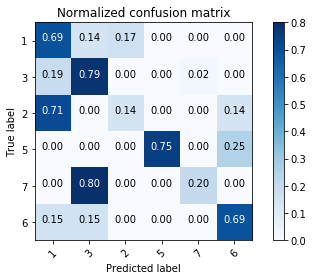

              precision    recall  f1-score   support

           1       0.65      0.61      0.62        33
           3       0.76      0.74      0.75        38
           2       0.33      0.25      0.29         8
           5       0.75      0.75      0.75         8
           7       0.62      0.71      0.67         7
           6       0.71      0.92      0.80        13

   micro avg       0.68      0.68      0.68       107
   macro avg       0.64      0.66      0.65       107
weighted avg       0.68      0.68      0.68       107

accuracy:  0.6822429906542056


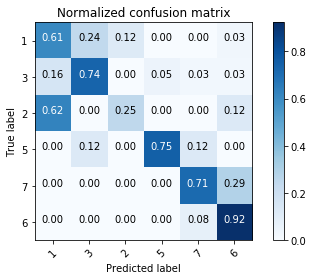

              precision    recall  f1-score   support

           1       0.67      0.81      0.73        37
           3       0.80      0.63      0.71        38
           2       0.42      0.56      0.48         9
           5       0.67      0.80      0.73         5
           7       0.25      0.50      0.33         2
           6       1.00      0.62      0.77        16

   micro avg       0.69      0.69      0.69       107
   macro avg       0.63      0.65      0.62       107
weighted avg       0.74      0.69      0.70       107

accuracy:  0.6915887850467289


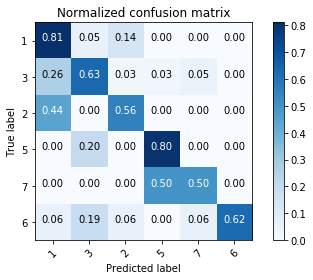

              precision    recall  f1-score   support

           1       0.60      0.68      0.63        37
           3       0.82      0.62      0.71        37
           2       0.09      0.14      0.11         7
           5       0.75      1.00      0.86         6
           7       0.50      0.75      0.60         4
           6       1.00      0.75      0.86        16

   micro avg       0.65      0.65      0.65       107
   macro avg       0.63      0.66      0.63       107
weighted avg       0.71      0.65      0.67       107

accuracy:  0.6542056074766355


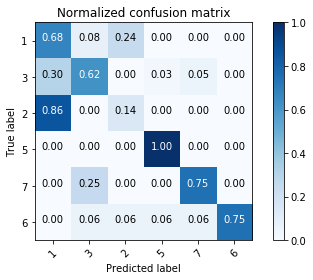

              precision    recall  f1-score   support

           1       0.59      0.70      0.64        33
           3       0.82      0.69      0.75        39
           2       0.25      0.20      0.22        10
           5       0.86      0.86      0.86         7
           7       0.75      0.60      0.67         5
           6       0.81      1.00      0.90        13

   micro avg       0.69      0.69      0.69       107
   macro avg       0.68      0.67      0.67       107
weighted avg       0.69      0.69      0.69       107

accuracy:  0.6915887850467289


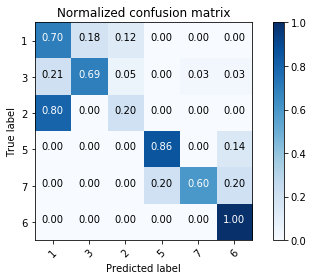

In [7]:
acc =[]
acc.append("Euclidean 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.50      0.85      0.63        27
           3       0.74      0.60      0.66        42
           2       0.50      0.10      0.17        10
           5       0.62      0.83      0.71         6
           7       0.50      0.17      0.25         6
           6       0.80      0.75      0.77        16

   micro avg       0.63      0.63      0.63       107
   macro avg       0.61      0.55      0.53       107
weighted avg       0.64      0.63      0.60       107

accuracy:  0.6261682242990654


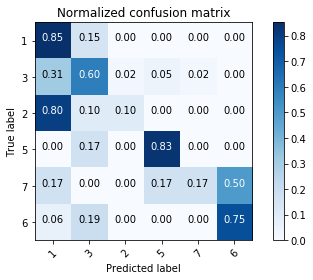

              precision    recall  f1-score   support

           1       0.59      0.77      0.67        43
           3       0.61      0.65      0.63        34
           2       0.00      0.00      0.00         7
           5       1.00      0.29      0.44         7
           7       0.00      0.00      0.00         3
           6       0.83      0.77      0.80        13

   micro avg       0.63      0.63      0.63       107
   macro avg       0.51      0.41      0.42       107
weighted avg       0.60      0.63      0.59       107

accuracy:  0.6261682242990654


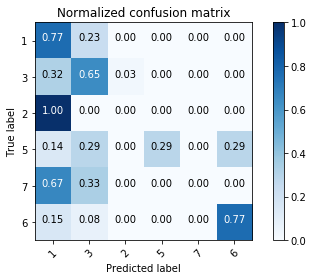

              precision    recall  f1-score   support

           1       0.52      0.87      0.65        30
           3       0.77      0.64      0.70        42
           2       0.00      0.00      0.00        11
           5       0.60      0.33      0.43         9
           7       0.67      0.50      0.57         4
           6       0.67      0.73      0.70        11

   micro avg       0.62      0.62      0.62       107
   macro avg       0.54      0.51      0.51       107
weighted avg       0.59      0.62      0.59       107

accuracy:  0.616822429906542


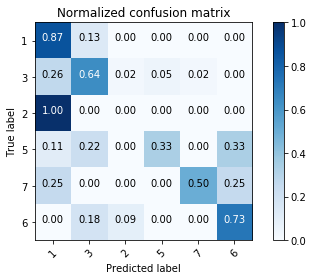

              precision    recall  f1-score   support

           1       0.60      0.62      0.61        40
           3       0.60      0.71      0.65        34
           2       0.14      0.17      0.15         6
           5       1.00      0.75      0.86         4
           7       1.00      0.20      0.33         5
           6       1.00      0.78      0.88        18

   micro avg       0.64      0.64      0.64       107
   macro avg       0.72      0.54      0.58       107
weighted avg       0.67      0.64      0.64       107

accuracy:  0.6355140186915887


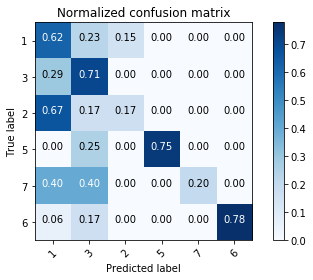

              precision    recall  f1-score   support

           1       0.56      0.89      0.69        35
           3       0.66      0.64      0.65        39
           2       0.50      0.09      0.15        11
           5       0.00      0.00      0.00         8
           7       1.00      0.40      0.57         5
           6       0.70      0.78      0.74         9

   micro avg       0.62      0.62      0.62       107
   macro avg       0.57      0.47      0.47       107
weighted avg       0.58      0.62      0.57       107

accuracy:  0.616822429906542


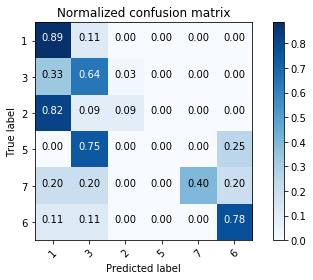

              precision    recall  f1-score   support

           1       0.57      0.77      0.66        35
           3       0.70      0.51      0.59        37
           2       0.33      0.17      0.22         6
           5       0.38      1.00      0.56         5
           7       0.00      0.00      0.00         4
           6       0.94      0.75      0.83        20

   micro avg       0.63      0.63      0.63       107
   macro avg       0.49      0.53      0.48       107
weighted avg       0.64      0.63      0.61       107

accuracy:  0.6261682242990654


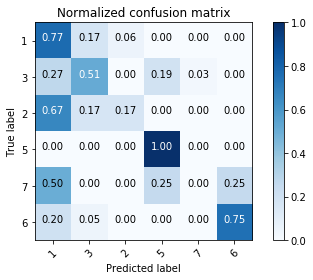

              precision    recall  f1-score   support

           1       0.53      0.82      0.65        28
           3       0.68      0.57      0.62        37
           2       0.67      0.17      0.27        12
           5       0.36      0.57      0.44         7
           7       0.50      0.20      0.29         5
           6       0.88      0.83      0.86        18

   micro avg       0.62      0.62      0.62       107
   macro avg       0.60      0.53      0.52       107
weighted avg       0.64      0.62      0.60       107

accuracy:  0.616822429906542


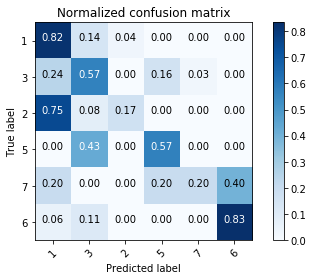

              precision    recall  f1-score   support

           1       0.67      0.83      0.74        42
           3       0.70      0.72      0.71        39
           2       0.00      0.00      0.00         5
           5       1.00      0.17      0.29         6
           7       0.50      0.25      0.33         4
           6       0.78      0.64      0.70        11

   micro avg       0.67      0.67      0.67       107
   macro avg       0.61      0.43      0.46       107
weighted avg       0.67      0.67      0.65       107

accuracy:  0.6728971962616822


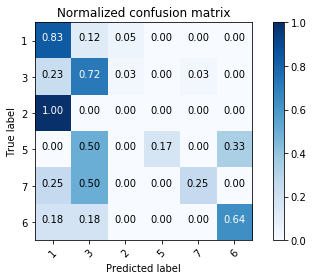

              precision    recall  f1-score   support

           1       0.49      0.87      0.63        31
           3       0.86      0.56      0.68        43
           2       0.40      0.25      0.31         8
           5       0.50      0.57      0.53         7
           7       0.00      0.00      0.00         7
           6       0.73      0.73      0.73        11

   micro avg       0.61      0.61      0.61       107
   macro avg       0.50      0.50      0.48       107
weighted avg       0.62      0.61      0.59       107

accuracy:  0.6074766355140186


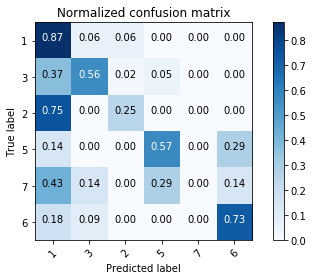

              precision    recall  f1-score   support

           1       0.60      0.64      0.62        39
           3       0.56      0.70      0.62        33
           2       0.00      0.00      0.00         9
           5       0.75      0.50      0.60         6
           7       0.50      0.50      0.50         2
           6       0.93      0.78      0.85        18

   micro avg       0.62      0.62      0.62       107
   macro avg       0.56      0.52      0.53       107
weighted avg       0.60      0.62      0.60       107

accuracy:  0.616822429906542


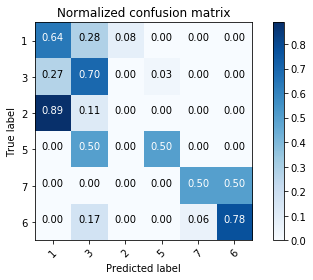

In [8]:
acc.append("Euclidean 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.52      0.88      0.65        34
           3       0.60      0.64      0.62        33
           2       0.00      0.00      0.00        13
           5       0.50      0.20      0.29         5
           7       0.00      0.00      0.00         5
           6       0.92      0.65      0.76        17

   micro avg       0.59      0.59      0.59       107
   macro avg       0.42      0.39      0.39       107
weighted avg       0.52      0.59      0.53       107

accuracy:  0.5887850467289719


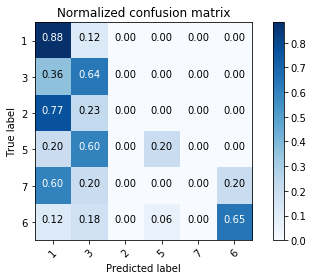

              precision    recall  f1-score   support

           1       0.69      0.75      0.72        36
           3       0.73      0.63      0.68        43
           2       0.11      0.25      0.15         4
           5       0.60      0.38      0.46         8
           7       0.00      0.00      0.00         4
           6       0.69      0.92      0.79        12

   micro avg       0.64      0.64      0.64       107
   macro avg       0.47      0.49      0.47       107
weighted avg       0.65      0.64      0.64       107

accuracy:  0.6448598130841121


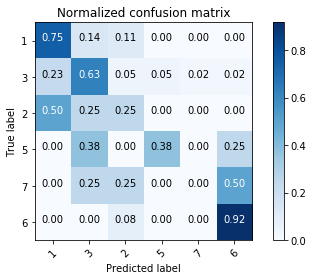

              precision    recall  f1-score   support

           1       0.68      0.81      0.74        37
           3       0.71      0.81      0.76        37
           2       1.00      0.14      0.25         7
           5       1.00      0.25      0.40         8
           7       0.00      0.00      0.00         5
           6       0.72      1.00      0.84        13

   micro avg       0.71      0.71      0.71       107
   macro avg       0.69      0.50      0.50       107
weighted avg       0.71      0.71      0.67       107

accuracy:  0.7102803738317757


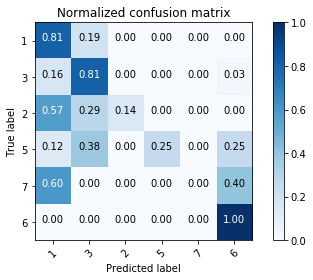

              precision    recall  f1-score   support

           1       0.53      0.82      0.64        33
           3       0.64      0.59      0.61        39
           2       0.33      0.10      0.15        10
           5       0.25      0.40      0.31         5
           7       0.00      0.00      0.00         4
           6       1.00      0.56      0.72        16

   micro avg       0.58      0.58      0.58       107
   macro avg       0.46      0.41      0.41       107
weighted avg       0.59      0.58      0.56       107

accuracy:  0.5794392523364486


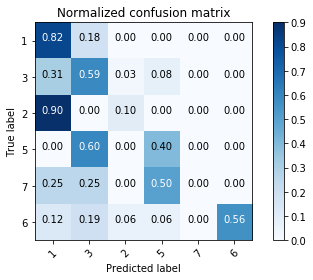

              precision    recall  f1-score   support

           1       0.56      0.69      0.62        36
           3       0.51      0.66      0.58        32
           2       0.00      0.00      0.00        12
           5       0.60      0.50      0.55         6
           7       0.00      0.00      0.00         7
           6       0.73      0.79      0.76        14

   micro avg       0.56      0.56      0.56       107
   macro avg       0.40      0.44      0.42       107
weighted avg       0.47      0.56      0.51       107

accuracy:  0.5607476635514018


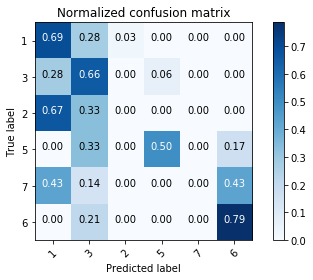

              precision    recall  f1-score   support

           1       0.56      0.88      0.68        34
           3       0.86      0.55      0.67        44
           2       0.00      0.00      0.00         5
           5       0.80      0.57      0.67         7
           7       0.25      0.50      0.33         2
           6       0.86      0.80      0.83        15

   micro avg       0.66      0.66      0.66       107
   macro avg       0.55      0.55      0.53       107
weighted avg       0.71      0.66      0.66       107

accuracy:  0.6635514018691588


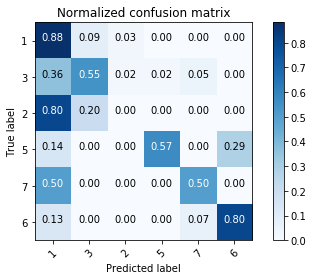

              precision    recall  f1-score   support

           1       0.57      0.83      0.67        36
           3       0.69      0.64      0.67        42
           2       0.00      0.00      0.00         8
           5       0.29      0.33      0.31         6
           7       0.00      0.00      0.00         6
           6       0.75      0.67      0.71         9

   micro avg       0.61      0.61      0.61       107
   macro avg       0.38      0.41      0.39       107
weighted avg       0.54      0.61      0.57       107

accuracy:  0.6074766355140186


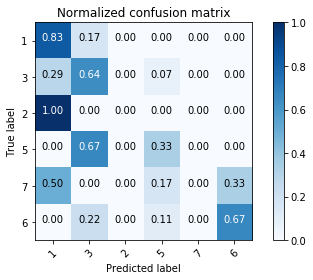

              precision    recall  f1-score   support

           1       0.56      0.79      0.66        34
           3       0.59      0.59      0.59        34
           2       0.00      0.00      0.00         9
           5       0.50      0.57      0.53         7
           7       0.00      0.00      0.00         3
           6       1.00      0.80      0.89        20

   micro avg       0.63      0.63      0.63       107
   macro avg       0.44      0.46      0.44       107
weighted avg       0.59      0.63      0.60       107

accuracy:  0.6261682242990654


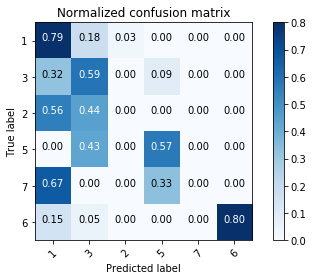

              precision    recall  f1-score   support

           1       0.57      0.77      0.66        35
           3       0.62      0.72      0.67        40
           2       0.00      0.00      0.00        13
           5       0.50      0.17      0.25         6
           7       0.50      0.50      0.50         2
           6       0.89      0.73      0.80        11

   micro avg       0.62      0.62      0.62       107
   macro avg       0.51      0.48      0.48       107
weighted avg       0.55      0.62      0.57       107

accuracy:  0.616822429906542


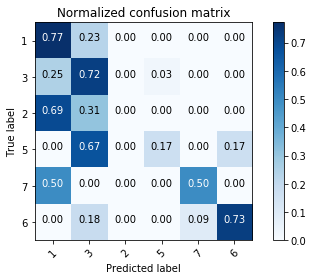

              precision    recall  f1-score   support

           1       0.60      0.91      0.73        35
           3       0.76      0.53      0.62        36
           2       0.25      0.25      0.25         4
           5       0.57      0.57      0.57         7
           7       0.00      0.00      0.00         7
           6       0.78      0.78      0.78        18

   micro avg       0.65      0.65      0.65       107
   macro avg       0.49      0.51      0.49       107
weighted avg       0.63      0.65      0.63       107

accuracy:  0.6542056074766355


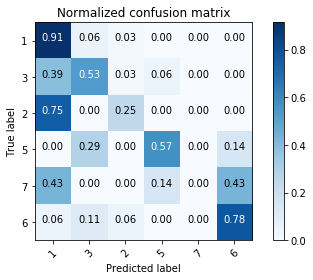

In [9]:
acc.append("Euclidean 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.54      0.88      0.67        33
           3       0.68      0.71      0.69        38
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         6
           6       0.85      0.79      0.81        14

   micro avg       0.63      0.63      0.63       107
   macro avg       0.34      0.40      0.36       107
weighted avg       0.52      0.63      0.56       107

accuracy:  0.6261682242990654


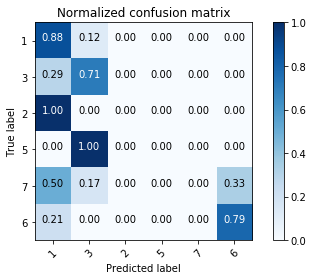

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.58      0.68      0.63        37
           3       0.50      0.53      0.51        38
           2       0.00      0.00      0.00         9
           5       0.38      0.60      0.46         5
           7       0.00      0.00      0.00         3
           6       0.85      0.73      0.79        15

   micro avg       0.55      0.55      0.55       107
   macro avg       0.38      0.42      0.40       107
weighted avg       0.51      0.55      0.53       107

accuracy:  0.5514018691588785


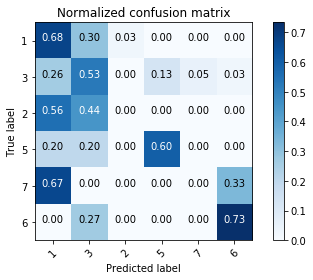

              precision    recall  f1-score   support

           1       0.52      0.81      0.63        37
           3       0.55      0.44      0.49        39
           2       0.00      0.00      0.00        10
           5       0.22      0.33      0.27         6
           7       0.00      0.00      0.00         6
           6       0.67      0.67      0.67         9

   micro avg       0.51      0.51      0.51       107
   macro avg       0.33      0.37      0.34       107
weighted avg       0.45      0.51      0.47       107

accuracy:  0.514018691588785


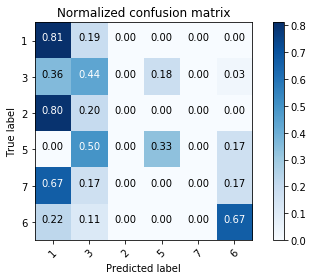

              precision    recall  f1-score   support

           1       0.65      0.85      0.74        33
           3       0.59      0.70      0.64        37
           2       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         7
           7       0.20      0.67      0.31         3
           6       0.90      0.45      0.60        20

   micro avg       0.61      0.61      0.61       107
   macro avg       0.39      0.44      0.38       107
weighted avg       0.58      0.61      0.57       107

accuracy:  0.6074766355140186


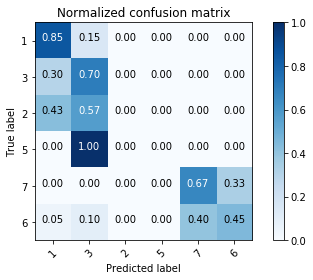

              precision    recall  f1-score   support

           1       0.63      0.74      0.68        42
           3       0.52      0.67      0.59        33
           2       0.00      0.00      0.00         9
           5       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         7
           6       0.83      0.77      0.80        13

   micro avg       0.60      0.60      0.60       107
   macro avg       0.37      0.42      0.39       107
weighted avg       0.52      0.60      0.55       107

accuracy:  0.5981308411214953


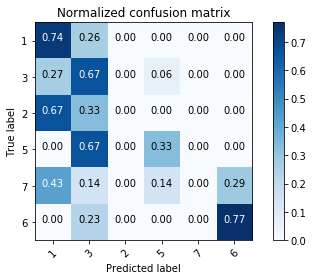

              precision    recall  f1-score   support

           1       0.48      0.89      0.62        28
           3       0.68      0.58      0.63        43
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         2
           6       0.80      0.75      0.77        16

   micro avg       0.58      0.58      0.58       107
   macro avg       0.33      0.37      0.34       107
weighted avg       0.52      0.58      0.53       107

accuracy:  0.5794392523364486


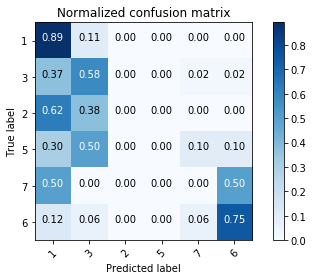

              precision    recall  f1-score   support

           1       0.52      0.91      0.66        33
           3       0.78      0.62      0.69        40
           2       0.00      0.00      0.00         9
           5       0.60      0.60      0.60         5
           7       0.00      0.00      0.00         6
           6       0.92      0.79      0.85        14

   micro avg       0.64      0.64      0.64       107
   macro avg       0.47      0.49      0.47       107
weighted avg       0.60      0.64      0.60       107

accuracy:  0.6448598130841121


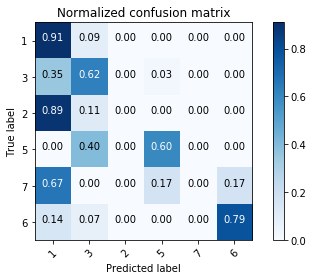

              precision    recall  f1-score   support

           1       0.61      0.73      0.67        37
           3       0.49      0.58      0.53        36
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           7       0.25      0.33      0.29         3
           6       0.75      0.80      0.77        15

   micro avg       0.57      0.57      0.57       107
   macro avg       0.35      0.41      0.38       107
weighted avg       0.49      0.57      0.53       107

accuracy:  0.5700934579439252


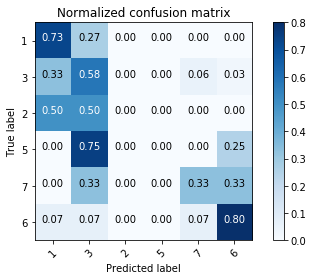

              precision    recall  f1-score   support

           1       0.51      0.77      0.61        35
           3       0.61      0.62      0.61        37
           2       0.00      0.00      0.00        10
           5       0.50      0.14      0.22         7
           7       0.00      0.00      0.00         5
           6       0.71      0.77      0.74        13

   micro avg       0.57      0.57      0.57       107
   macro avg       0.39      0.38      0.36       107
weighted avg       0.50      0.57      0.52       107

accuracy:  0.5700934579439252


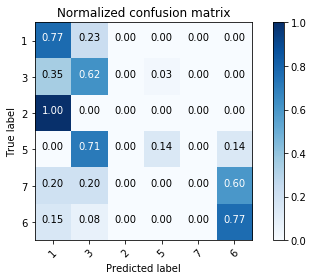

              precision    recall  f1-score   support

           1       0.64      0.86      0.73        35
           3       0.68      0.69      0.68        39
           2       0.50      0.14      0.22         7
           5       1.00      0.33      0.50         6
           7       0.00      0.00      0.00         4
           6       0.88      0.88      0.88        16

   micro avg       0.69      0.69      0.69       107
   macro avg       0.61      0.48      0.50       107
weighted avg       0.67      0.69      0.66       107

accuracy:  0.6915887850467289


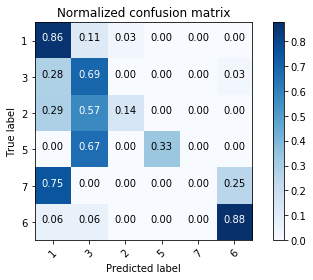

In [10]:
acc.append("Euclidean 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.57      0.71      0.63        41
           3       0.49      0.51      0.50        37
           2       0.00      0.00      0.00        11
           5       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         3
           6       0.77      0.77      0.77        13

   micro avg       0.56      0.56      0.56       107
   macro avg       0.39      0.50      0.43       107
weighted avg       0.49      0.56      0.52       107

accuracy:  0.5607476635514018


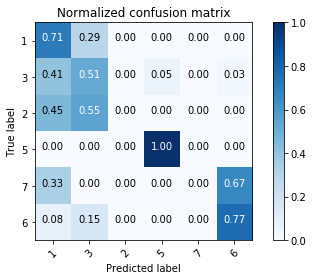

              precision    recall  f1-score   support

           1       0.48      0.86      0.62        29
           3       0.67      0.62      0.64        39
           2       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         6
           6       0.72      0.81      0.76        16

   micro avg       0.58      0.58      0.58       107
   macro avg       0.31      0.38      0.34       107
weighted avg       0.48      0.58      0.51       107

accuracy:  0.5794392523364486


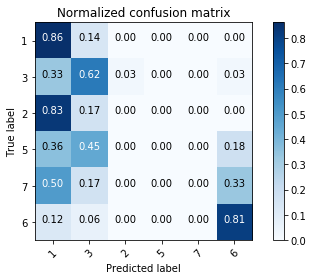

              precision    recall  f1-score   support

           1       0.45      0.88      0.59        33
           3       0.71      0.48      0.57        42
           2       0.00      0.00      0.00        10
           5       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         3
           6       0.92      0.69      0.79        16

   micro avg       0.57      0.57      0.57       107
   macro avg       0.43      0.40      0.39       107
weighted avg       0.57      0.57      0.54       107

accuracy:  0.5700934579439252


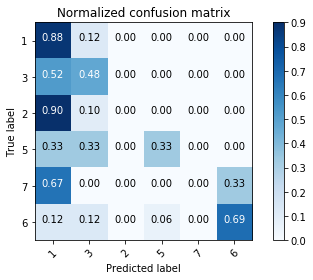

              precision    recall  f1-score   support

           1       0.60      0.78      0.68        37
           3       0.57      0.68      0.62        34
           2       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         6
           6       0.58      0.85      0.69        13

   micro avg       0.59      0.59      0.59       107
   macro avg       0.29      0.38      0.33       107
weighted avg       0.46      0.59      0.52       107

accuracy:  0.5887850467289719


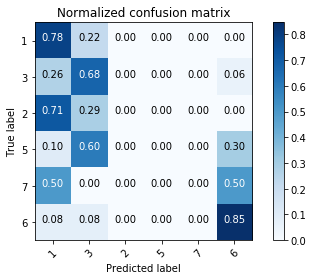

              precision    recall  f1-score   support

           1       0.57      0.94      0.71        34
           3       0.61      0.61      0.61        36
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         7
           6       0.67      0.67      0.67        15

   micro avg       0.60      0.60      0.60       107
   macro avg       0.31      0.37      0.33       107
weighted avg       0.48      0.60      0.53       107

accuracy:  0.5981308411214953


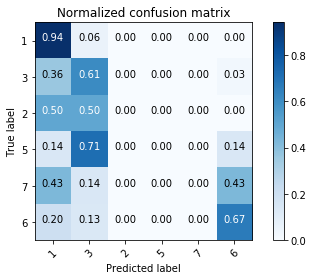

              precision    recall  f1-score   support

           1       0.50      0.67      0.57        36
           3       0.62      0.60      0.61        40
           2       0.00      0.00      0.00         9
           5       0.50      0.17      0.25         6
           7       0.00      0.00      0.00         2
           6       0.81      0.93      0.87        14

   micro avg       0.58      0.58      0.58       107
   macro avg       0.40      0.39      0.38       107
weighted avg       0.53      0.58      0.55       107

accuracy:  0.5794392523364486


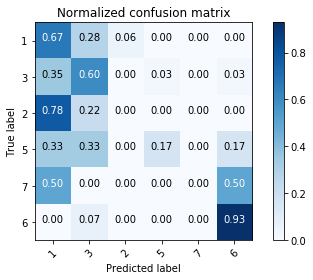

              precision    recall  f1-score   support

           1       0.62      0.77      0.69        39
           3       0.57      0.53      0.55        40
           2       0.00      0.00      0.00         8
           5       0.33      1.00      0.50         3
           7       0.00      0.00      0.00         3
           6       0.85      0.79      0.81        14

   micro avg       0.61      0.61      0.61       107
   macro avg       0.40      0.51      0.42       107
weighted avg       0.56      0.61      0.58       107

accuracy:  0.6074766355140186


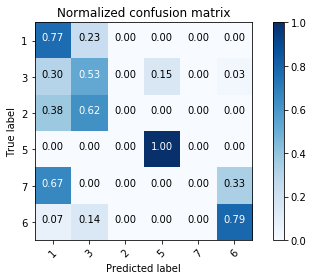

              precision    recall  f1-score   support

           1       0.51      0.87      0.64        31
           3       0.62      0.64      0.63        36
           2       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         6
           6       0.71      0.80      0.75        15

   micro avg       0.58      0.58      0.58       107
   macro avg       0.31      0.38      0.34       107
weighted avg       0.46      0.58      0.50       107

accuracy:  0.5794392523364486


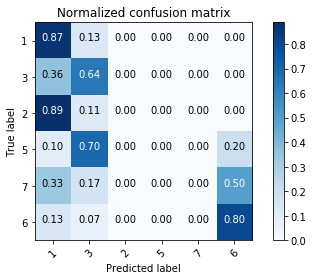

              precision    recall  f1-score   support

           1       0.54      0.73      0.62        37
           3       0.51      0.54      0.53        37
           2       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4
           6       0.76      0.76      0.76        17

   micro avg       0.56      0.56      0.56       107
   macro avg       0.30      0.34      0.32       107
weighted avg       0.49      0.56      0.52       107

accuracy:  0.5607476635514018


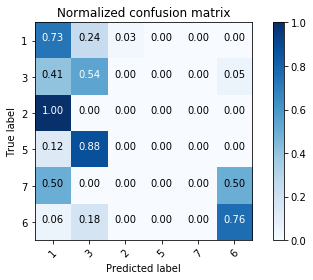

              precision    recall  f1-score   support

           1       0.51      0.85      0.64        33
           3       0.66      0.69      0.68        39
           2       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         5
           6       0.70      0.58      0.64        12

   micro avg       0.58      0.58      0.58       107
   macro avg       0.31      0.35      0.32       107
weighted avg       0.48      0.58      0.51       107

accuracy:  0.5794392523364486


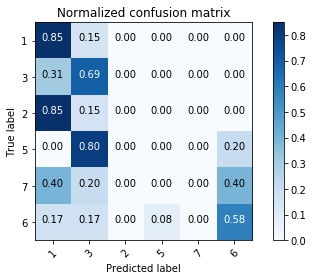

In [11]:
acc.append("Euclidean 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.50      0.88      0.64        34
           3       0.71      0.54      0.61        41
           2       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         6
           6       0.75      0.75      0.75        16

   micro avg       0.60      0.60      0.60       107
   macro avg       0.33      0.36      0.33       107
weighted avg       0.54      0.60      0.55       107

accuracy:  0.5981308411214953


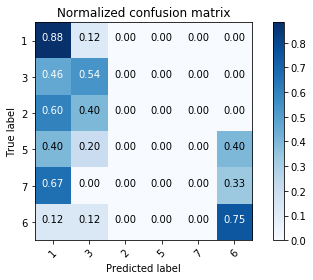

              precision    recall  f1-score   support

           1       0.55      0.78      0.64        36
           3       0.50      0.54      0.52        35
           2       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3
           6       0.61      0.85      0.71        13

   micro avg       0.54      0.54      0.54       107
   macro avg       0.28      0.36      0.31       107
weighted avg       0.42      0.54      0.47       107

accuracy:  0.5420560747663551


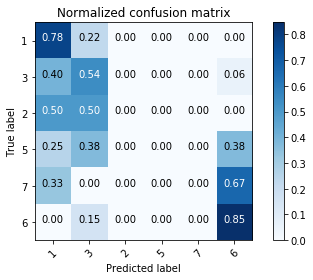

              precision    recall  f1-score   support

           1       0.42      0.78      0.55        32
           3       0.62      0.47      0.54        38
           2       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         7
           6       0.53      0.71      0.61        14

   micro avg       0.50      0.50      0.50       107
   macro avg       0.26      0.33      0.28       107
weighted avg       0.42      0.50      0.43       107

accuracy:  0.4953271028037383


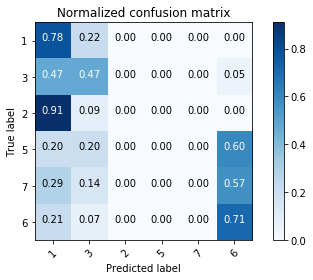

              precision    recall  f1-score   support

           1       0.55      0.68      0.61        38
           3       0.51      0.61      0.55        38
           2       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         2
           6       0.87      0.87      0.87        15

   micro avg       0.58      0.58      0.58       107
   macro avg       0.32      0.36      0.34       107
weighted avg       0.50      0.58      0.54       107

accuracy:  0.5794392523364486


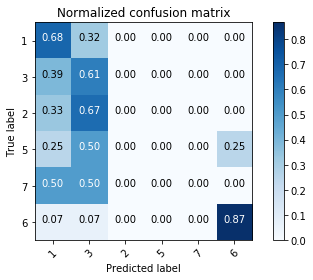

              precision    recall  f1-score   support

           1       0.52      0.73      0.61        37
           3       0.57      0.51      0.54        41
           2       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         4
           6       0.56      0.83      0.67        12

   micro avg       0.54      0.54      0.54       107
   macro avg       0.27      0.35      0.30       107
weighted avg       0.46      0.54      0.49       107

accuracy:  0.5420560747663551


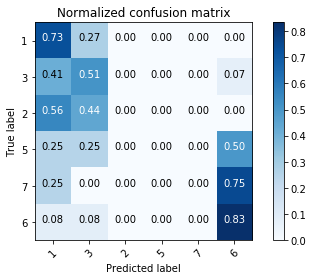

              precision    recall  f1-score   support

           1       0.50      0.91      0.65        33
           3       0.50      0.57      0.53        35
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         5
           6       1.00      0.41      0.58        17

   micro avg       0.53      0.53      0.53       107
   macro avg       0.33      0.32      0.29       107
weighted avg       0.48      0.53      0.47       107

accuracy:  0.5327102803738317


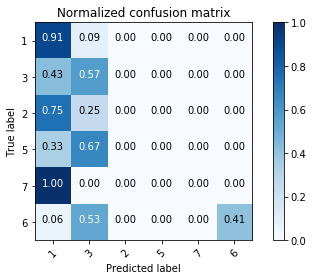

              precision    recall  f1-score   support

           1       0.59      0.77      0.67        39
           3       0.61      0.57      0.59        40
           2       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         4
           6       0.77      0.77      0.77        13

   micro avg       0.59      0.59      0.59       107
   macro avg       0.33      0.35      0.34       107
weighted avg       0.53      0.59      0.56       107

accuracy:  0.5887850467289719


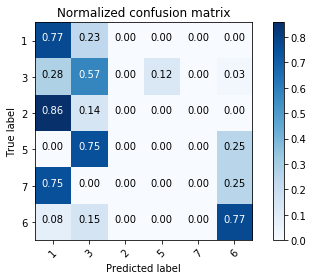

              precision    recall  f1-score   support

           1       0.44      0.77      0.56        31
           3       0.39      0.47      0.42        36
           2       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         5
           6       0.38      0.19      0.25        16

   micro avg       0.41      0.41      0.41       107
   macro avg       0.20      0.24      0.21       107
weighted avg       0.31      0.41      0.34       107

accuracy:  0.411214953271028


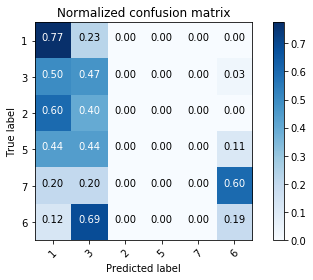

              precision    recall  f1-score   support

           1       0.49      0.73      0.59        33
           3       0.60      0.67      0.63        39
           2       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           6       0.80      0.71      0.75        17

   micro avg       0.58      0.58      0.58       107
   macro avg       0.32      0.35      0.33       107
weighted avg       0.50      0.58      0.53       107

accuracy:  0.5794392523364486


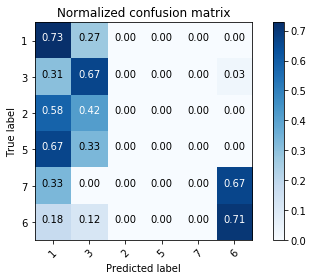

              precision    recall  f1-score   support

           1       0.59      0.81      0.68        37
           3       0.56      0.54      0.55        37
           2       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         6
           6       0.56      0.83      0.67        12

   micro avg       0.56      0.56      0.56       107
   macro avg       0.28      0.36      0.32       107
weighted avg       0.46      0.56      0.50       107

accuracy:  0.5607476635514018


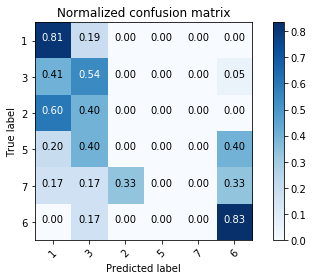

In [12]:
acc.append("Euclidean 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.27      0.96      0.42        27
           3       0.25      0.02      0.04        47
           2       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         3
           6       1.00      0.43      0.60        14

   micro avg       0.31      0.31      0.31       107
   macro avg       0.25      0.24      0.18       107
weighted avg       0.31      0.31      0.20       107

accuracy:  0.308411214953271


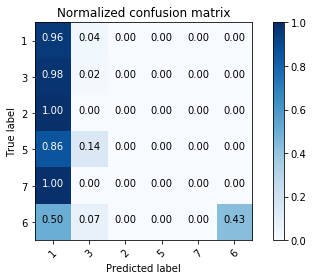

              precision    recall  f1-score   support

           1       0.67      0.09      0.16        43
           3       0.29      1.00      0.45        29
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        15

   micro avg       0.31      0.31      0.31       107
   macro avg       0.16      0.18      0.10       107
weighted avg       0.35      0.31      0.19       107

accuracy:  0.308411214953271


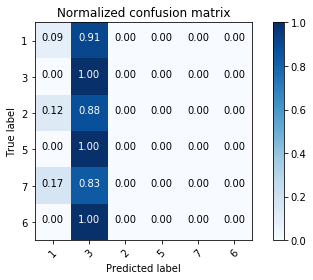

              precision    recall  f1-score   support

           1       0.31      0.47      0.37        34
           3       0.42      0.61      0.49        38
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        15

   micro avg       0.36      0.36      0.36       107
   macro avg       0.12      0.18      0.14       107
weighted avg       0.25      0.36      0.29       107

accuracy:  0.3644859813084112


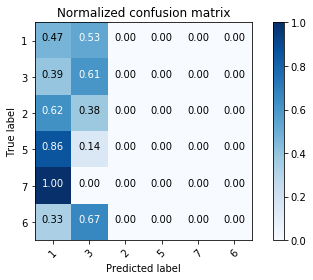

              precision    recall  f1-score   support

           1       0.36      0.39      0.37        36
           3       0.40      0.71      0.51        38
           2       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        14

   micro avg       0.38      0.38      0.38       107
   macro avg       0.13      0.18      0.15       107
weighted avg       0.26      0.38      0.31       107

accuracy:  0.38317757009345793


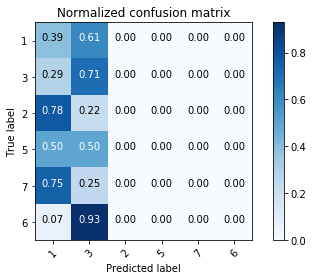

              precision    recall  f1-score   support

           1       0.38      0.64      0.48        36
           3       0.60      0.57      0.59        42
           2       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         5
           6       1.00      0.70      0.82        10

   micro avg       0.50      0.50      0.50       107
   macro avg       0.33      0.32      0.31       107
weighted avg       0.46      0.50      0.47       107

accuracy:  0.5046728971962616


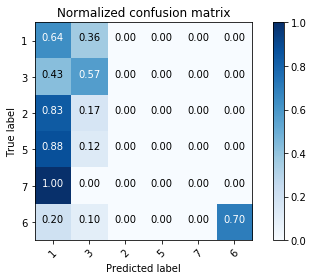

              precision    recall  f1-score   support

           1       0.52      0.38      0.44        34
           3       0.35      0.85      0.50        34
           2       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        19

   micro avg       0.39      0.39      0.39       107
   macro avg       0.15      0.21      0.16       107
weighted avg       0.28      0.39      0.30       107

accuracy:  0.3925233644859813


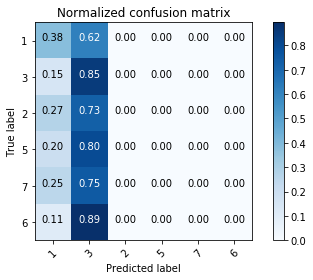

              precision    recall  f1-score   support

           1       0.42      0.63      0.51        35
           3       0.40      0.65      0.49        34
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        16

   micro avg       0.41      0.41      0.41       107
   macro avg       0.14      0.21      0.17       107
weighted avg       0.27      0.41      0.32       107

accuracy:  0.411214953271028


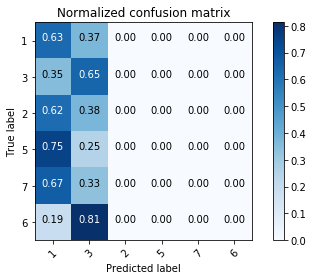

              precision    recall  f1-score   support

           1       0.33      0.31      0.32        35
           3       0.46      0.74      0.57        42
           2       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         3
           6       0.43      0.23      0.30        13

   micro avg       0.42      0.42      0.42       107
   macro avg       0.20      0.21      0.20       107
weighted avg       0.34      0.42      0.37       107

accuracy:  0.4205607476635514


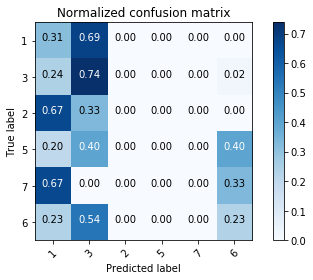

              precision    recall  f1-score   support

           1       0.38      0.40      0.39        35
           3       0.39      0.69      0.50        39
           2       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        14

   micro avg       0.38      0.38      0.38       107
   macro avg       0.13      0.18      0.15       107
weighted avg       0.27      0.38      0.31       107

accuracy:  0.38317757009345793


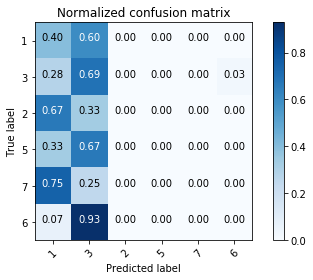

              precision    recall  f1-score   support

           1       0.38      0.51      0.44        35
           3       0.37      0.59      0.45        37
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        15

   micro avg       0.37      0.37      0.37       107
   macro avg       0.12      0.18      0.15       107
weighted avg       0.25      0.37      0.30       107

accuracy:  0.37383177570093457


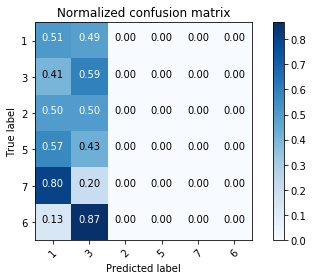

In [13]:
acc.append("Euclidean 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.34      0.97      0.50        33
           3       0.58      0.19      0.29        36
           2       0.00      0.00      0.00        12
           5       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        18

   micro avg       0.36      0.36      0.36       107
   macro avg       0.15      0.19      0.13       107
weighted avg       0.30      0.36      0.25       107

accuracy:  0.3644859813084112


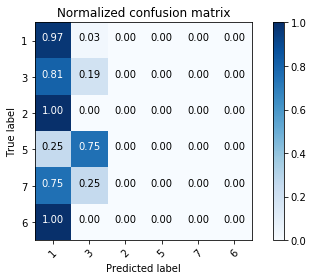

              precision    recall  f1-score   support

           1       0.37      1.00      0.54        37
           3       0.67      0.10      0.17        40
           2       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        11

   micro avg       0.38      0.38      0.38       107
   macro avg       0.17      0.18      0.12       107
weighted avg       0.38      0.38      0.25       107

accuracy:  0.38317757009345793


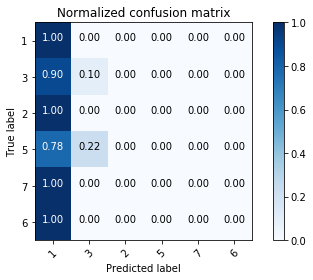

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        43
           3       0.26      1.00      0.41        28
           2       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        15

   micro avg       0.26      0.26      0.26       107
   macro avg       0.04      0.17      0.07       107
weighted avg       0.07      0.26      0.11       107

accuracy:  0.2616822429906542


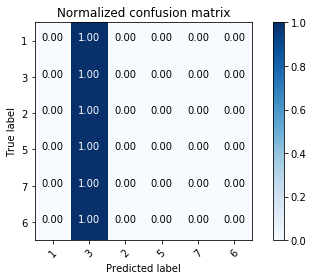

              precision    recall  f1-score   support

           1       0.25      1.00      0.40        27
           3       0.00      0.00      0.00        48
           2       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        14

   micro avg       0.25      0.25      0.25       107
   macro avg       0.04      0.17      0.07       107
weighted avg       0.06      0.25      0.10       107

accuracy:  0.2523364485981308


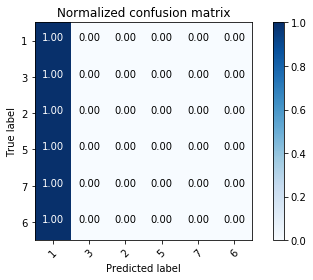

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        38
           3       0.35      1.00      0.51        37
           2       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         6
           6       0.00      0.00      0.00        12

   micro avg       0.35      0.35      0.35       107
   macro avg       0.06      0.17      0.09       107
weighted avg       0.12      0.35      0.18       107

accuracy:  0.34579439252336447


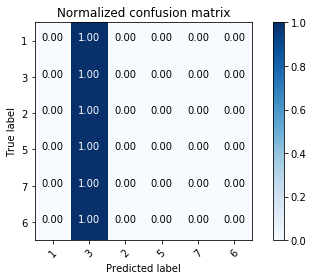

              precision    recall  f1-score   support

           1       0.30      1.00      0.46        32
           3       0.00      0.00      0.00        39
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3
           6       0.00      0.00      0.00        17

   micro avg       0.30      0.30      0.30       107
   macro avg       0.05      0.17      0.08       107
weighted avg       0.09      0.30      0.14       107

accuracy:  0.29906542056074764


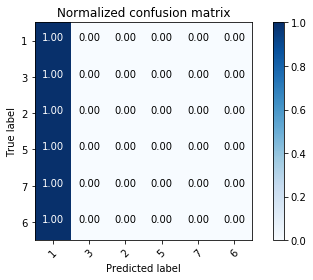

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        38
           3       0.35      1.00      0.51        37
           2       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        11

   micro avg       0.35      0.35      0.35       107
   macro avg       0.06      0.17      0.09       107
weighted avg       0.12      0.35      0.18       107

accuracy:  0.34579439252336447


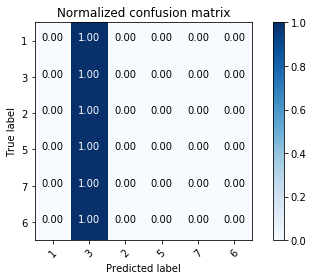

              precision    recall  f1-score   support

           1       0.30      1.00      0.46        32
           3       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        18

   micro avg       0.30      0.30      0.30       107
   macro avg       0.05      0.17      0.08       107
weighted avg       0.09      0.30      0.14       107

accuracy:  0.29906542056074764


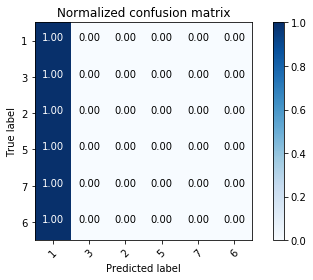

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        39
           3       0.35      1.00      0.51        37
           2       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        16

   micro avg       0.35      0.35      0.35       107
   macro avg       0.06      0.17      0.09       107
weighted avg       0.12      0.35      0.18       107

accuracy:  0.34579439252336447


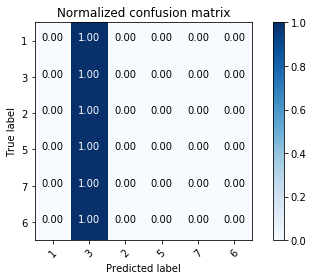

              precision    recall  f1-score   support

           1       0.29      1.00      0.45        31
           3       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        13

   micro avg       0.29      0.29      0.29       107
   macro avg       0.05      0.17      0.07       107
weighted avg       0.08      0.29      0.13       107

accuracy:  0.2897196261682243


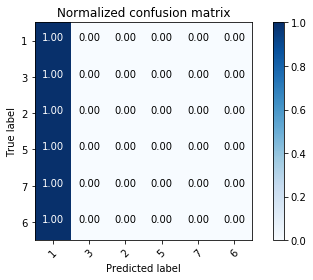

In [14]:
acc.append("Euclidean 100")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Minkowski metric and k tunning

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.60      0.88      0.71        32
           3       0.77      0.71      0.74        38
           2       0.50      0.11      0.18         9
           5       0.71      0.62      0.67         8
           7       1.00      0.50      0.67         6
           6       0.92      0.86      0.89        14

   micro avg       0.71      0.71      0.71       107
   macro avg       0.75      0.61      0.64       107
weighted avg       0.72      0.71      0.69       107

accuracy:  0.7102803738317757


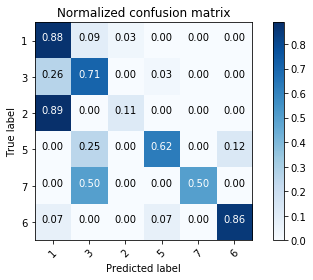

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.68      0.74      0.71        38
           3       0.83      0.63      0.72        38
           2       0.33      0.50      0.40         8
           5       0.71      1.00      0.83         5
           7       0.50      0.67      0.57         3
           6       0.79      0.73      0.76        15

   micro avg       0.69      0.69      0.69       107
   macro avg       0.64      0.71      0.66       107
weighted avg       0.72      0.69      0.70       107

accuracy:  0.6915887850467289


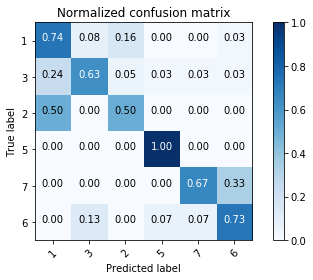

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.61      0.82      0.70        33
           3       0.70      0.60      0.65        35
           2       0.38      0.33      0.35         9
           5       0.88      0.88      0.88         8
           7       0.50      0.17      0.25         6
           6       0.87      0.81      0.84        16

   micro avg       0.67      0.67      0.67       107
   macro avg       0.66      0.60      0.61       107
weighted avg       0.67      0.67      0.66       107

accuracy:  0.6728971962616822


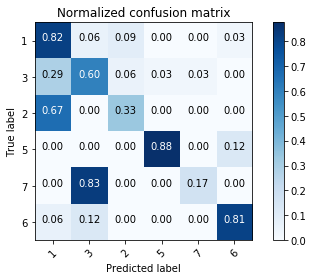

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.68      0.70      0.69        37
           3       0.75      0.66      0.70        41
           2       0.33      0.38      0.35         8
           5       0.60      0.60      0.60         5
           7       0.17      0.33      0.22         3
           6       0.92      0.92      0.92        13

   micro avg       0.67      0.67      0.67       107
   macro avg       0.58      0.60      0.58       107
weighted avg       0.69      0.67      0.68       107

accuracy:  0.6728971962616822


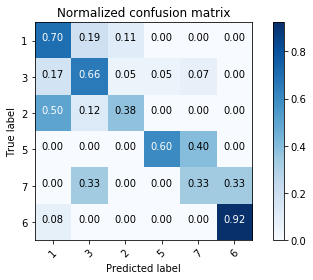

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.54      0.75      0.63        28
           3       0.79      0.62      0.70        37
           2       0.33      0.17      0.22        12
           5       0.67      1.00      0.80         6
           7       0.44      1.00      0.62         4
           6       1.00      0.75      0.86        20

   micro avg       0.66      0.66      0.66       107
   macro avg       0.63      0.71      0.64       107
weighted avg       0.69      0.66      0.66       107

accuracy:  0.6635514018691588


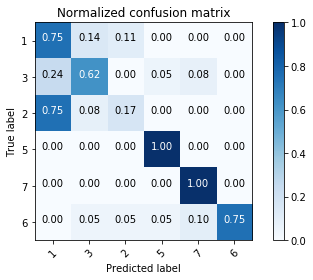

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.78      0.74      0.76        42
           3       0.70      0.72      0.71        39
           2       0.10      0.20      0.13         5
           5       1.00      0.57      0.73         7
           7       1.00      0.60      0.75         5
           6       0.70      0.78      0.74         9

   micro avg       0.69      0.69      0.69       107
   macro avg       0.71      0.60      0.64       107
weighted avg       0.74      0.69      0.71       107

accuracy:  0.6915887850467289


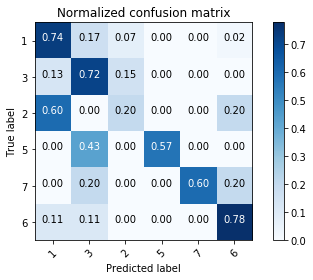

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.69      0.51      0.59        35
           3       0.66      0.64      0.65        36
           2       0.31      0.57      0.40         7
           5       0.50      1.00      0.67         4
           7       0.25      0.40      0.31         5
           6       0.94      0.80      0.86        20

   micro avg       0.63      0.63      0.63       107
   macro avg       0.56      0.65      0.58       107
weighted avg       0.67      0.63      0.64       107

accuracy:  0.6261682242990654


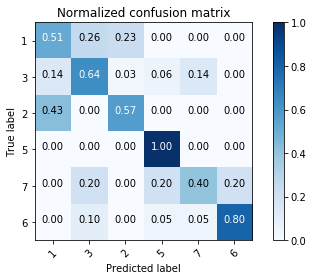

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.67      0.94      0.79        35
           3       0.89      0.78      0.83        40
           2       0.50      0.20      0.29        10
           5       0.83      0.56      0.67         9
           7       0.75      0.75      0.75         4
           6       0.78      0.78      0.78         9

   micro avg       0.76      0.76      0.76       107
   macro avg       0.74      0.67      0.68       107
weighted avg       0.76      0.76      0.74       107

accuracy:  0.7570093457943925


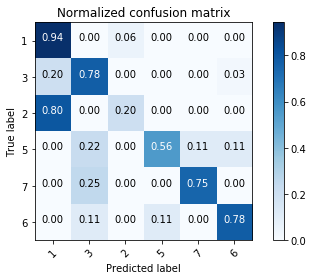

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.69      0.87      0.77        31
           3       0.83      0.62      0.71        40
           2       0.40      0.29      0.33         7
           5       0.62      0.62      0.62         8
           7       0.40      1.00      0.57         2
           6       0.80      0.84      0.82        19

   micro avg       0.72      0.72      0.72       107
   macro avg       0.63      0.71      0.64       107
weighted avg       0.73      0.72      0.72       107

accuracy:  0.719626168224299


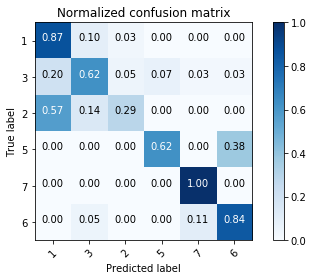

              precision    recall  f1-score   support

           1       0.57      0.64      0.60        39
           3       0.51      0.56      0.53        36
           2       0.22      0.20      0.21        10
           5       0.62      1.00      0.77         5
           7       0.00      0.00      0.00         7
           6       0.86      0.60      0.71        10

   micro avg       0.54      0.54      0.54       107
   macro avg       0.46      0.50      0.47       107
weighted avg       0.51      0.54      0.52       107

accuracy:  0.5420560747663551


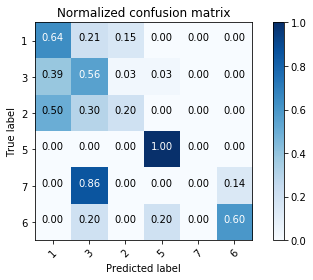

In [15]:
acc.append("Minkowski 1")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.71      0.77      0.74        39
           3       0.68      0.68      0.68        38
           2       0.00      0.00      0.00         5
           5       0.62      0.71      0.67         7
           7       0.00      0.00      0.00         3
           6       0.92      0.80      0.86        15

   micro avg       0.68      0.68      0.68       107
   macro avg       0.49      0.49      0.49       107
weighted avg       0.67      0.68      0.68       107

accuracy:  0.6822429906542056


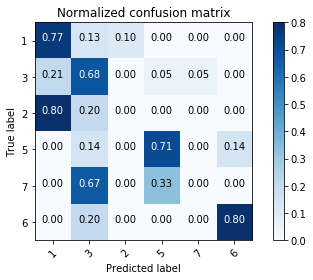

              precision    recall  f1-score   support

           1       0.47      0.84      0.60        31
           3       0.71      0.63      0.67        38
           2       0.00      0.00      0.00        12
           5       0.75      0.50      0.60         6
           7       0.00      0.00      0.00         6
           6       0.77      0.71      0.74        14

   micro avg       0.59      0.59      0.59       107
   macro avg       0.45      0.45      0.44       107
weighted avg       0.53      0.59      0.54       107

accuracy:  0.5887850467289719


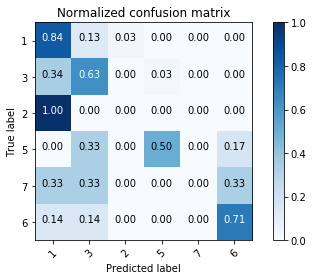

              precision    recall  f1-score   support

           1       0.51      0.77      0.61        30
           3       0.70      0.72      0.71        39
           2       0.00      0.00      0.00        11
           5       0.50      0.38      0.43         8
           7       0.00      0.00      0.00         5
           6       0.81      0.93      0.87        14

   micro avg       0.63      0.63      0.63       107
   macro avg       0.42      0.46      0.44       107
weighted avg       0.54      0.63      0.58       107

accuracy:  0.6261682242990654


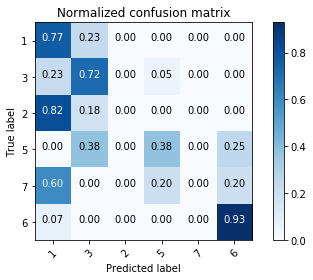

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.60      0.68      0.64        40
           3       0.60      0.57      0.58        37
           2       0.10      0.17      0.12         6
           5       0.33      0.20      0.25         5
           7       0.25      0.25      0.25         4
           6       0.90      0.60      0.72        15

   micro avg       0.56      0.56      0.56       107
   macro avg       0.46      0.41      0.43       107
weighted avg       0.59      0.56      0.57       107

accuracy:  0.5607476635514018


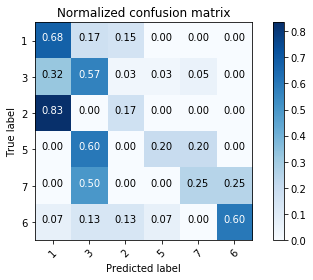

              precision    recall  f1-score   support

           1       0.58      0.81      0.68        32
           3       0.66      0.74      0.70        42
           2       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         6
           6       0.58      0.70      0.64        10

   micro avg       0.60      0.60      0.60       107
   macro avg       0.30      0.38      0.33       107
weighted avg       0.49      0.60      0.53       107

accuracy:  0.5981308411214953


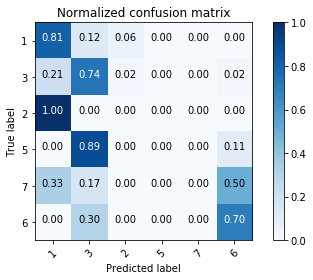

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.62      0.63      0.62        38
           3       0.67      0.65      0.66        34
           2       0.33      0.33      0.33         9
           5       0.60      0.75      0.67         4
           7       0.33      0.33      0.33         3
           6       0.89      0.84      0.86        19

   micro avg       0.64      0.64      0.64       107
   macro avg       0.57      0.59      0.58       107
weighted avg       0.65      0.64      0.65       107

accuracy:  0.6448598130841121


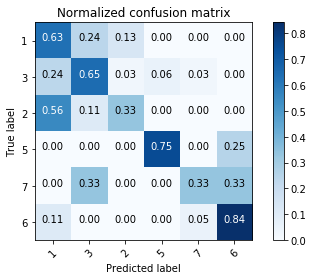

              precision    recall  f1-score   support

           1       0.54      0.84      0.66        37
           3       0.77      0.55      0.64        44
           2       0.33      0.17      0.22         6
           5       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         6
           6       0.73      0.80      0.76        10

   micro avg       0.60      0.60      0.60       107
   macro avg       0.40      0.39      0.38       107
weighted avg       0.59      0.60      0.57       107

accuracy:  0.5981308411214953


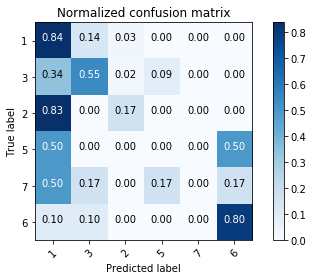

              precision    recall  f1-score   support

           1       0.58      0.85      0.69        33
           3       0.58      0.69      0.63        32
           2       0.00      0.00      0.00        11
           5       1.00      0.22      0.36         9
           7       0.25      0.33      0.29         3
           6       0.93      0.74      0.82        19

   micro avg       0.63      0.63      0.63       107
   macro avg       0.56      0.47      0.47       107
weighted avg       0.61      0.63      0.59       107

accuracy:  0.6261682242990654


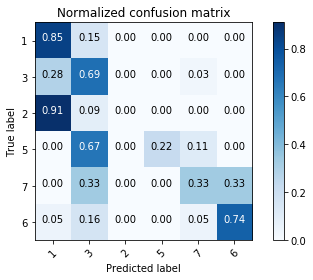

set(['1', '3', '2', '5', '7', '6'])
              precision    recall  f1-score   support

           1       0.53      0.73      0.62        33
           3       0.67      0.57      0.62        42
           2       0.17      0.12      0.14         8
           5       0.50      0.40      0.44         5
           7       0.33      0.20      0.25         5
           6       0.77      0.71      0.74        14

   micro avg       0.58      0.58      0.58       107
   macro avg       0.49      0.46      0.47       107
weighted avg       0.58      0.58      0.57       107

accuracy:  0.5794392523364486


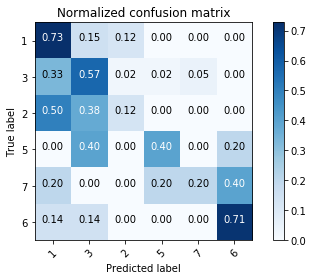

              precision    recall  f1-score   support

           1       0.67      0.81      0.73        37
           3       0.65      0.82      0.73        34
           2       0.00      0.00      0.00         9
           5       0.83      0.62      0.71         8
           7       1.00      0.25      0.40         4
           6       1.00      0.80      0.89        15

   micro avg       0.71      0.71      0.71       107
   macro avg       0.69      0.55      0.58       107
weighted avg       0.68      0.71      0.68       107

accuracy:  0.7102803738317757


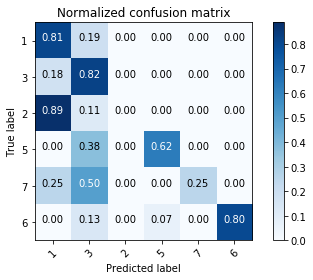

In [16]:
acc.append("Minkowski 5")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

              precision    recall  f1-score   support

           1       0.62      0.75      0.68        40
           3       0.54      0.64      0.59        39
           2       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         2
           6       0.80      0.67      0.73        12

   micro avg       0.59      0.59      0.59       107
   macro avg       0.33      0.34      0.33       107
weighted avg       0.52      0.59      0.55       107

accuracy:  0.5887850467289719


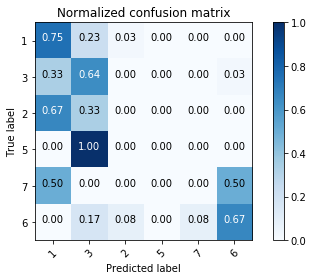

              precision    recall  f1-score   support

           1       0.52      0.87      0.65        30
           3       0.66      0.51      0.58        37
           2       0.00      0.00      0.00        11
           5       0.17      0.40      0.24         5
           7       0.00      0.00      0.00         7
           6       0.94      0.88      0.91        17

   micro avg       0.58      0.58      0.58       107
   macro avg       0.38      0.44      0.40       107
weighted avg       0.53      0.58      0.54       107

accuracy:  0.5794392523364486


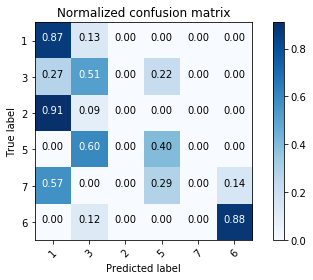

              precision    recall  f1-score   support

           1       0.59      0.85      0.70        34
           3       0.71      0.68      0.69        37
           2       0.50      0.25      0.33         4
           5       1.00      0.50      0.67         6
           7       0.00      0.00      0.00         8
           6       0.78      0.78      0.78        18

   micro avg       0.67      0.67      0.67       107
   macro avg       0.60      0.51      0.53       107
weighted avg       0.64      0.67      0.64       107

accuracy:  0.6728971962616822


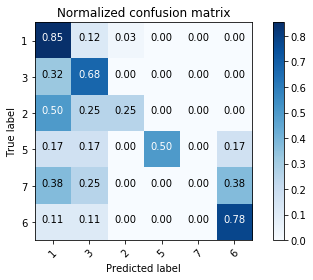

              precision    recall  f1-score   support

           1       0.56      0.78      0.65        36
           3       0.66      0.69      0.68        39
           2       0.00      0.00      0.00        13
           5       0.67      0.57      0.62         7
           7       0.00      0.00      0.00         1
           6       1.00      0.73      0.84        11

   micro avg       0.63      0.63      0.63       107
   macro avg       0.48      0.46      0.46       107
weighted avg       0.57      0.63      0.59       107

accuracy:  0.6261682242990654


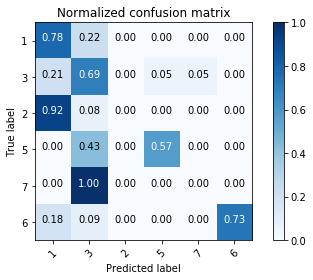

In [ ]:
acc.append("Minkowski 10")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [ ]:
acc.append("Minkowski 15")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [ ]:
acc.append("Minkowski 20")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [ ]:
acc.append("Minkowski 30")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [ ]:
acc.append("Minkowski 50")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [ ]:
acc.append("Minkowski 100")
for i in range(5):
    for train_index, test_index in kf.split(df):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        print "accuracy: ", accuracy_score(y_test, predicted)
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [ ]:
print acc


with open("accGlassWithoutNoiseNormalised.csv", 'wb') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)
    #writer.writerow(list_of_emails)
    